In [2]:
import cv2
from matplotlib import pyplot as plt
import os
import easyocr
import numpy as np
import pytesseract

reader = easyocr.Reader(["en"])
pytesseract.pytesseract.tesseract_cmd = r'C:\Users\Martijn\AppData\Local\Programs\Tesseract-OCR\tesseract'

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


In [3]:
def easyocr_detect(image, binary_1, binary_2, showImg=False,):
    if not os.path.isfile(image):
        raise Exception("Input image path is not a file!")

    img = cv2.imread(image, cv2.IMREAD_GRAYSCALE)
    img = cv2.GaussianBlur(img, (5, 5), 1)
    # img = cv2.threshold(img, 60, 255, cv2.THRESH_BINARY)[1]
    img = cv2.adaptiveThreshold(
        img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, binary_1, binary_2
)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    if showImg == True:
        plt.imshow(img)
        plt.show()

    result = reader.readtext(img, allowlist="0123456789")
    if len(result) > 0:
        return result[0][1]
    else:
        return "unknown"


In [5]:
# Detect speed with OCR Pytesseract

def detect_7_segments(image):
    config = '--psm 6 -c tessedit_char_whitelist="0123456789"'
    return pytesseract.image_to_string(image, lang='letsgodigital', config=config)

speed = "speed/"

for img_file in os.listdir(speed):
    path = os.path.join(speed, img_file)
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    img = cv2.GaussianBlur(img, (5, 5), 1)
    img = cv2.threshold(img, 60, 255, cv2.THRESH_BINARY)[1]
    # img = cv2.threshold(img, 60, 255, cv2.THRESH_BINARY)[1]
    # img = cv2.bitwise_not(img)
    convert = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


    img = cv2.adaptiveThreshold(
        img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, binary_1, binary_2
)
    
    # Plots the image
    # plt.imshow(convert)
    # plt.show()
    print(path, detect_7_segments(img).replace('\f', '').replace('\n', '').replace(' ', ''))

speed/00.jpg 25
speed/01.jpg 98
speed/02.jpg 25
speed/03.jpg 3
speed/04.jpg 19
speed/05.jpg 38
speed/06.jpg 98
speed/07.jpg 28
speed/08.jpg 28
speed/09.jpg 1
speed/10.jpg 1
speed/11.jpg 1
speed/12.jpg 9
speed/13.jpg 15
speed/14.jpg 38
speed/15.jpg 186
speed/16.jpg 58
speed/17.jpg 58
speed/18.jpg 15
speed/19.jpg 25
speed/20.jpg 28
speed/21.jpg 28
speed/22.jpg 56
speed/23.jpg 33
speed/25.jpg 311
speed/26.jpg 28
speed/27.jpg 25
speed/28.jpg 25
speed/29.jpg 86
speed/30.jpg 78
speed/31.jpg 67
speed/32.jpg 188
speed/33.jpg 56
speed/34.jpg 38
speed/35.jpg 


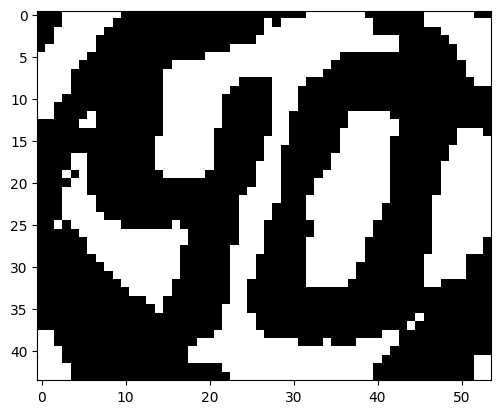

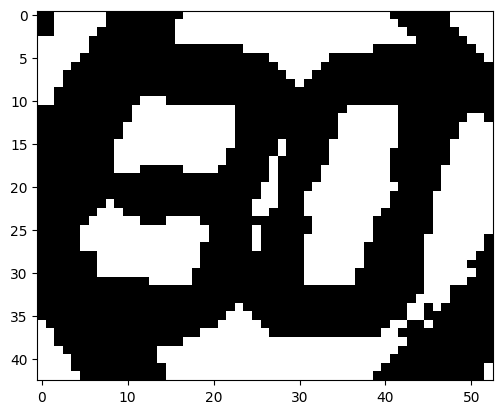

[02.jpg] Detected speed unknown does not match actual speed 30


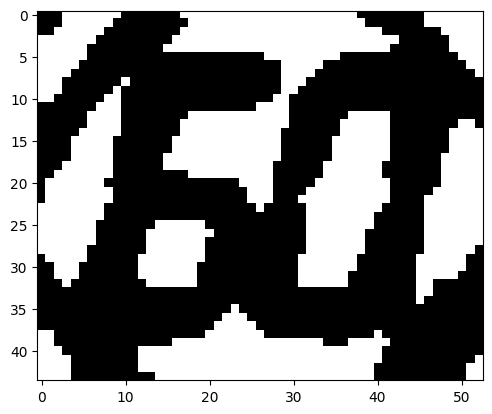

[03.jpg] Detected speed unknown does not match actual speed 60


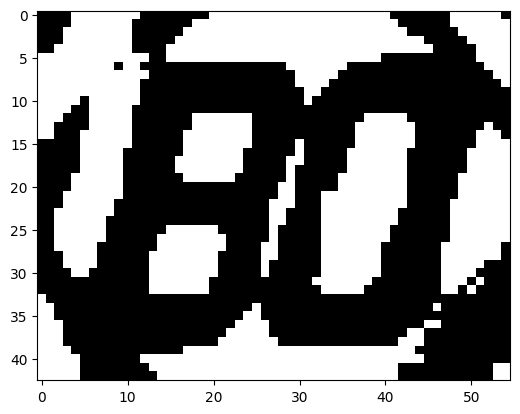

[04.jpg] Detected speed 190 does not match actual speed 80


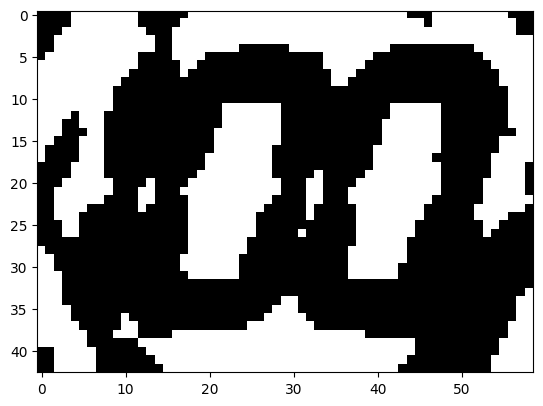

[05.jpg] Detected speed  does not match actual speed 100


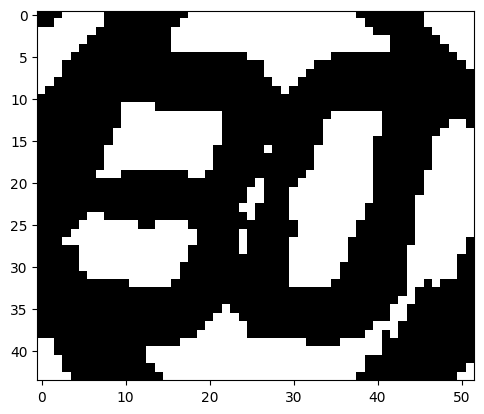

[06.jpg] Detected speed unknown does not match actual speed 30


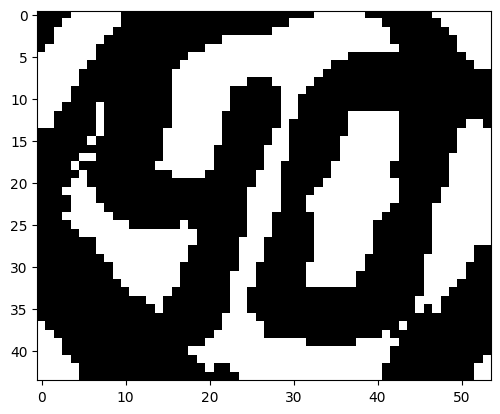

[07.jpg] Detected speed unknown does not match actual speed 40


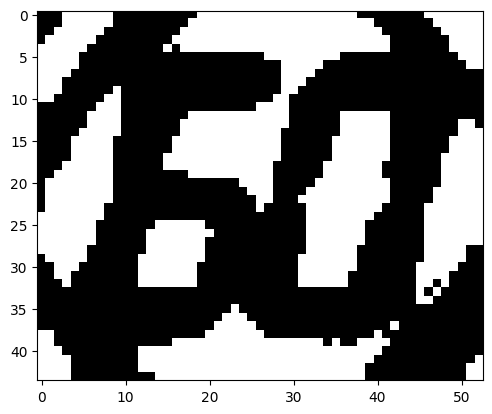

[08.jpg] Detected speed unknown does not match actual speed 60


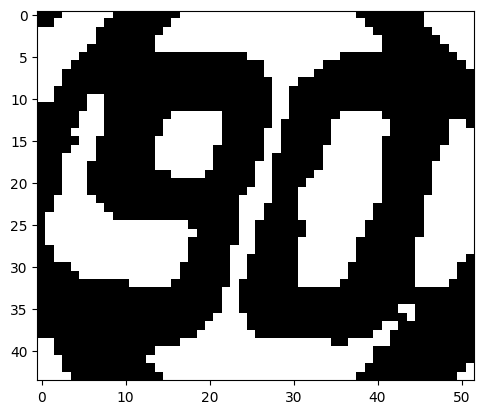

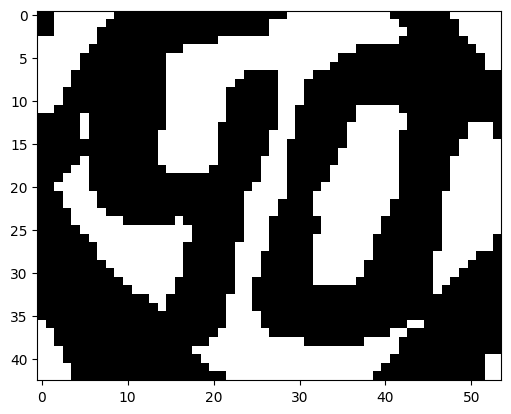

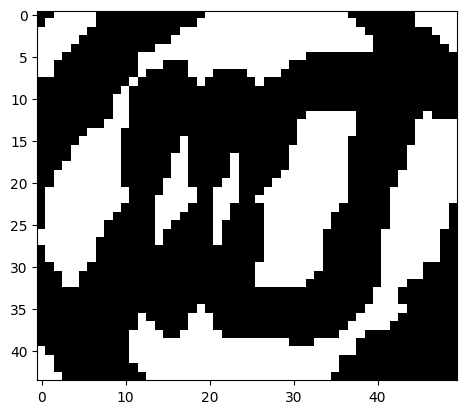

[11.jpg] Detected speed unknown does not match actual speed 110


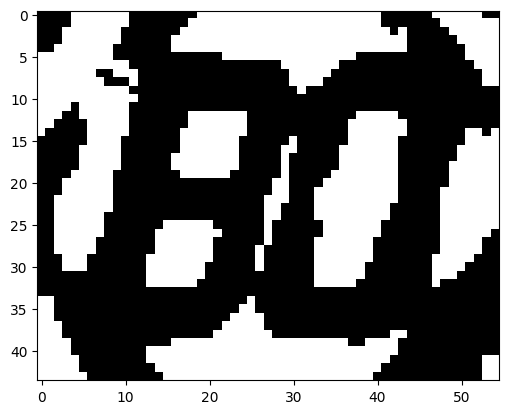

[12.jpg] Detected speed 180 does not match actual speed 80


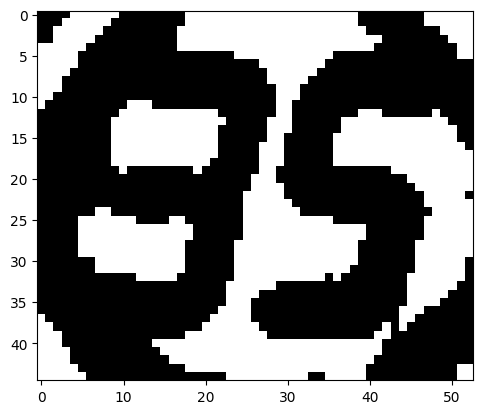

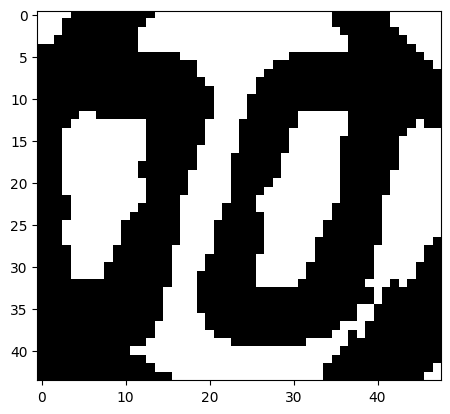

[14.jpg] Detected speed unknown does not match actual speed 70


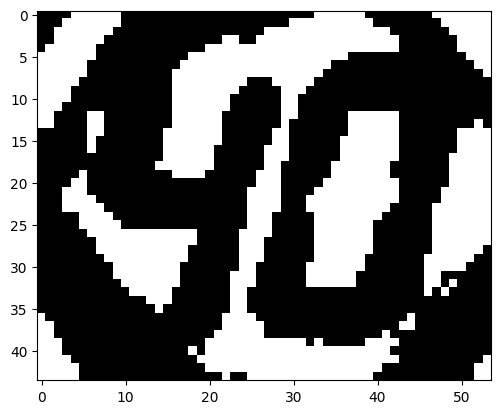

[15.jpg] Detected speed unknown does not match actual speed 40


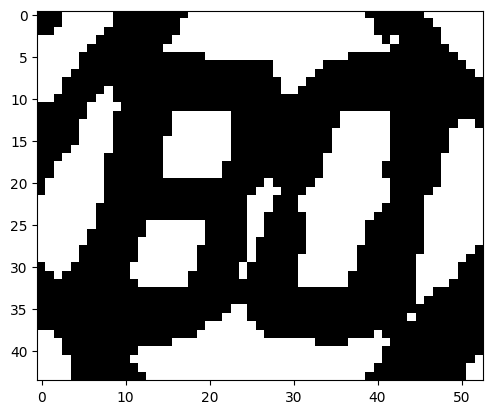

[16.jpg] Detected speed unknown does not match actual speed 80


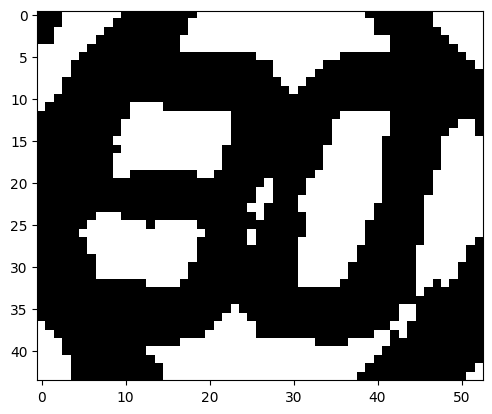

[17.jpg] Detected speed 31 does not match actual speed 30


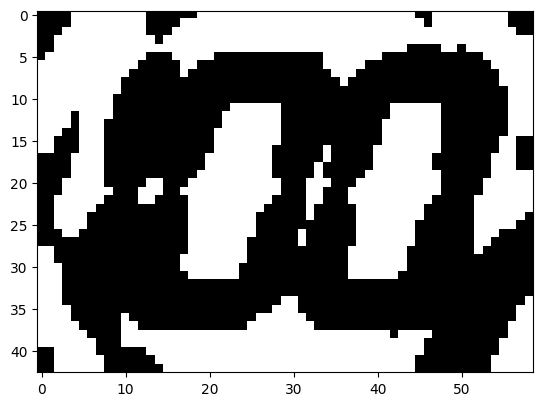

[18.jpg] Detected speed 7 does not match actual speed 100


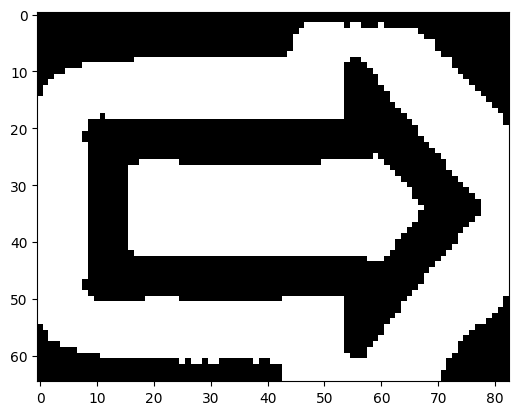

[19.jpg] Detected speed unknown does not match actual speed 90


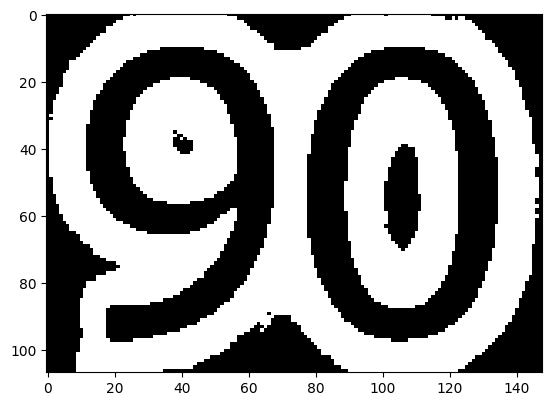

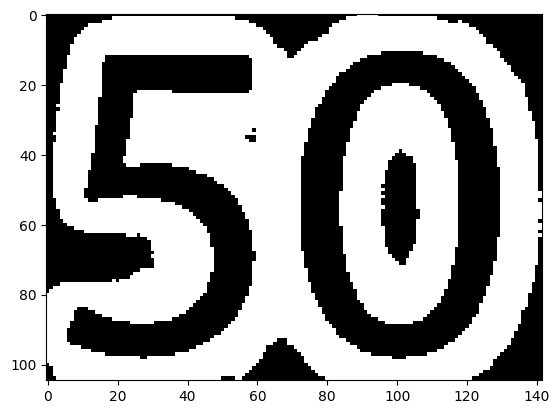

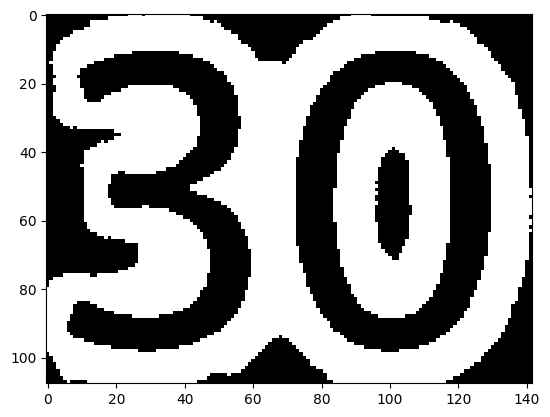

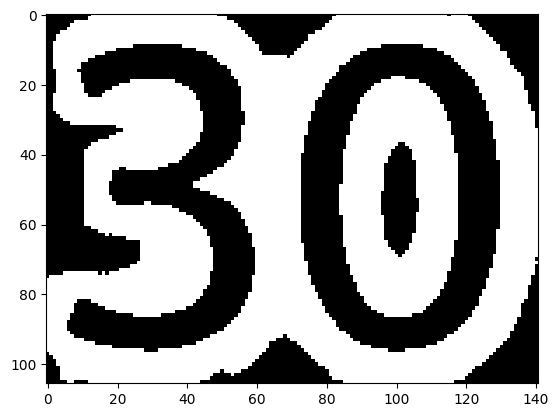

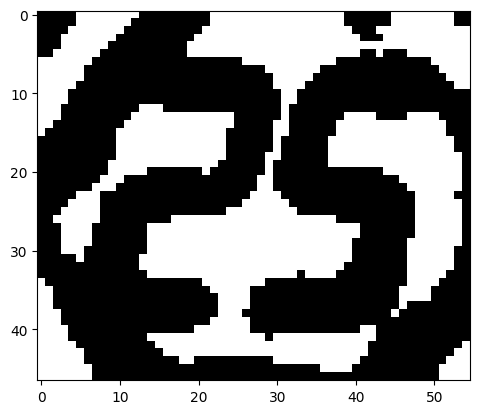

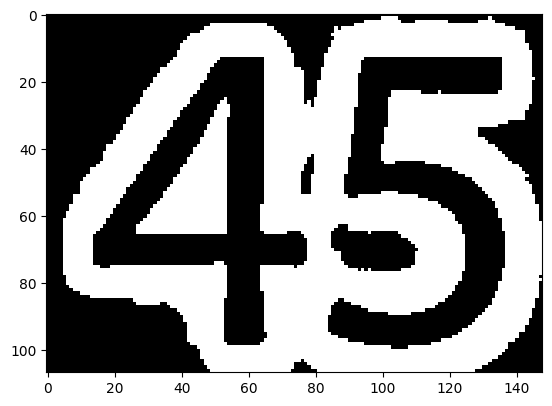

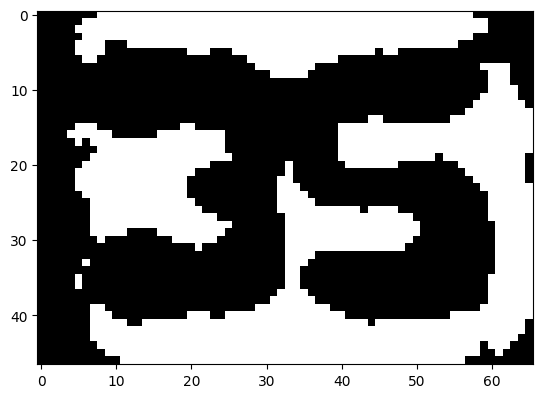

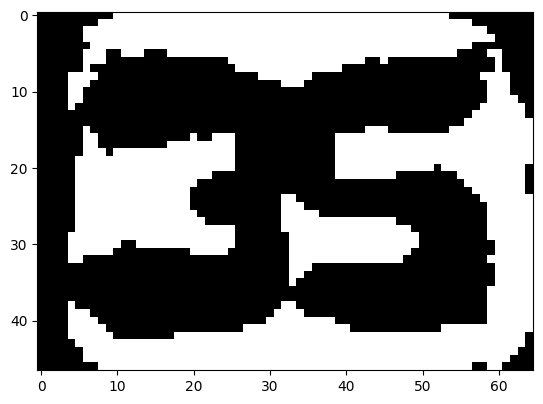

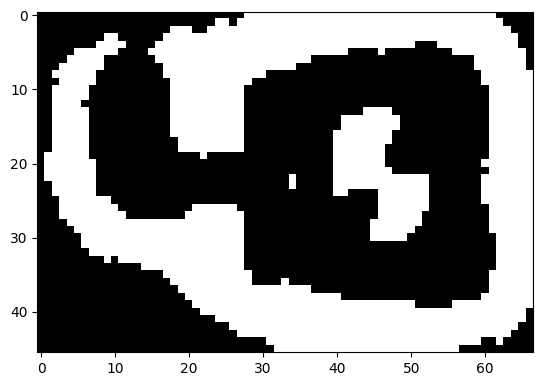

[28.jpg] Detected speed unknown does not match actual speed 40


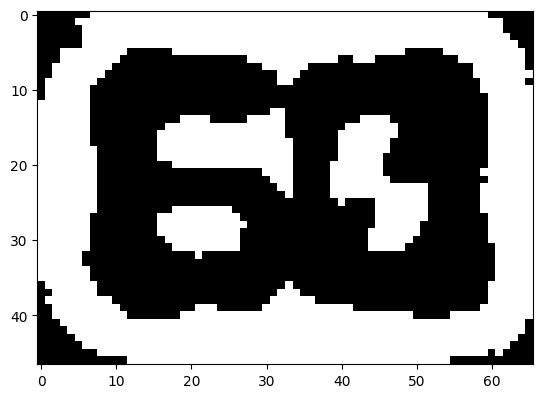

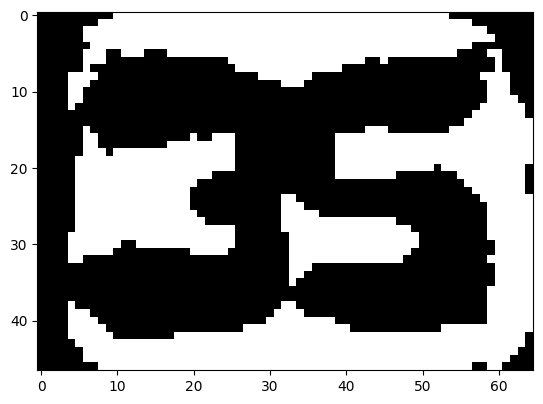

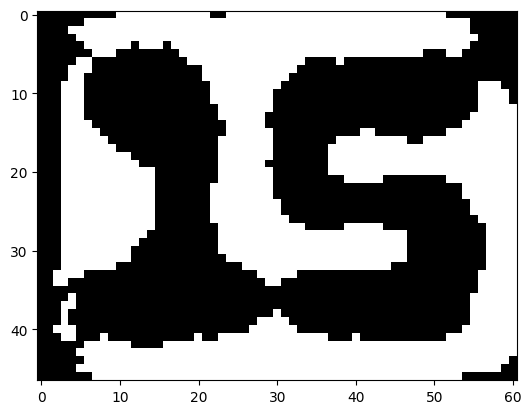

[31.jpg] Detected speed 05 does not match actual speed 15


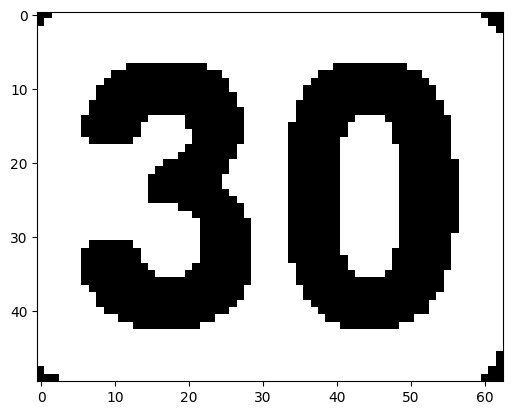

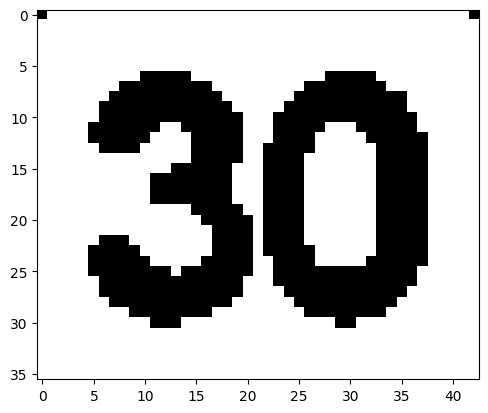

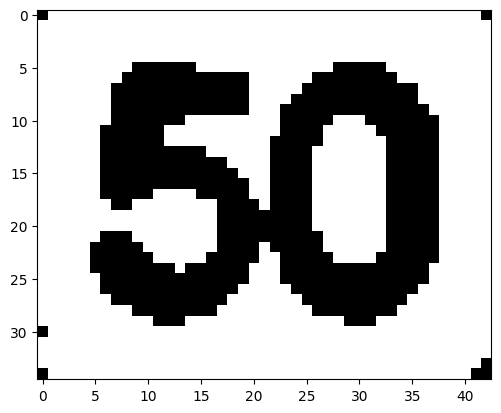

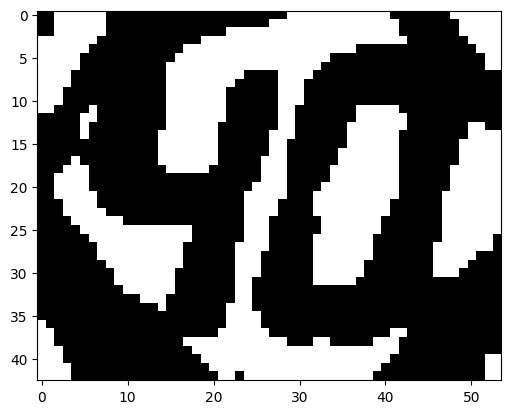

[35.jpg] Detected speed unknown does not match actual speed 40


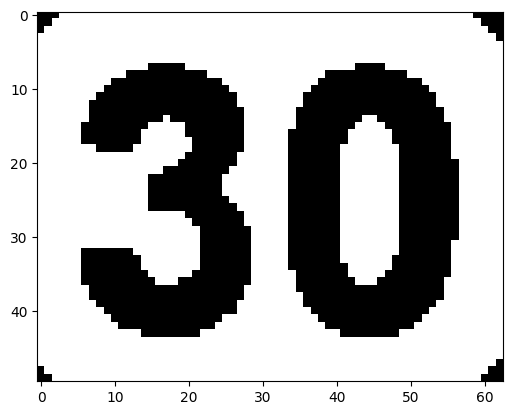

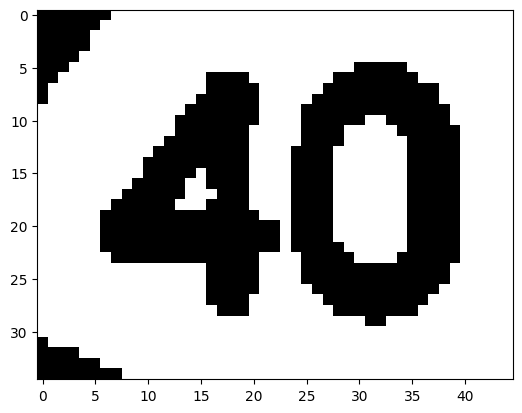

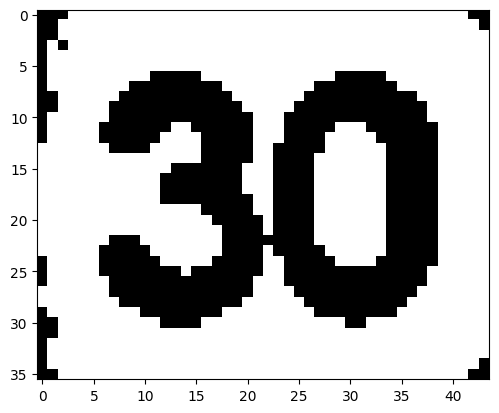

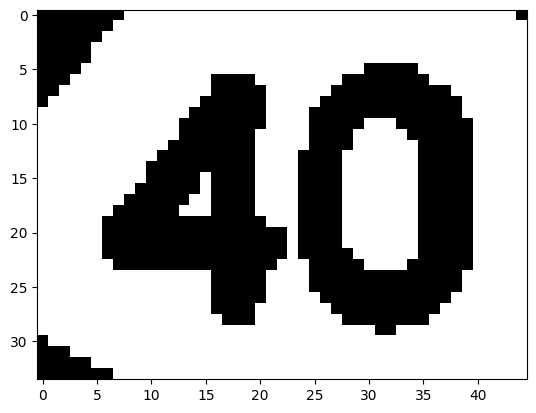

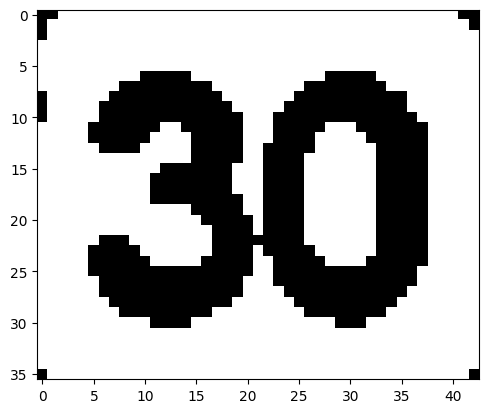

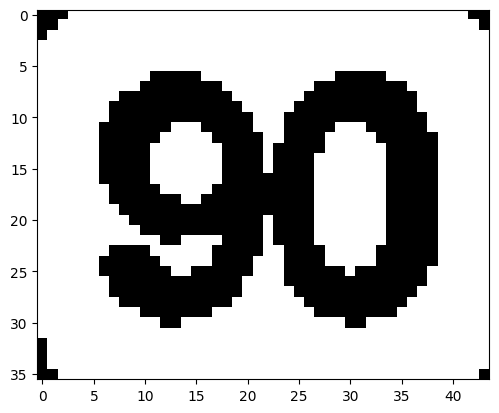

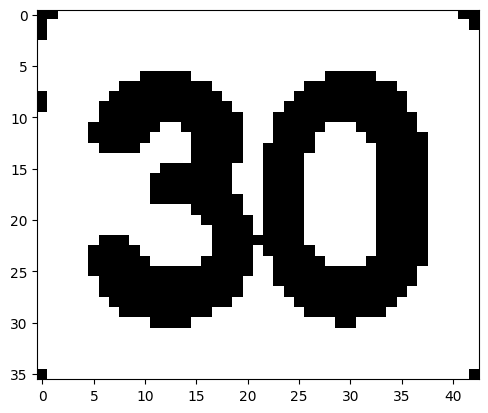

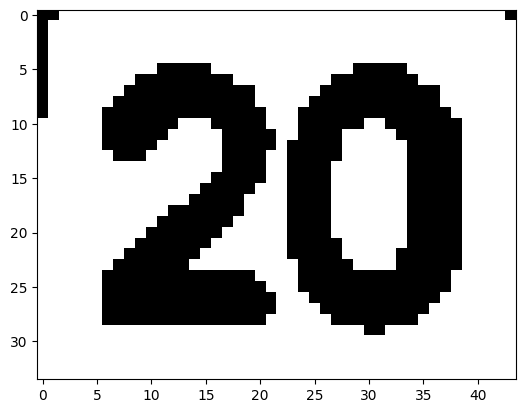

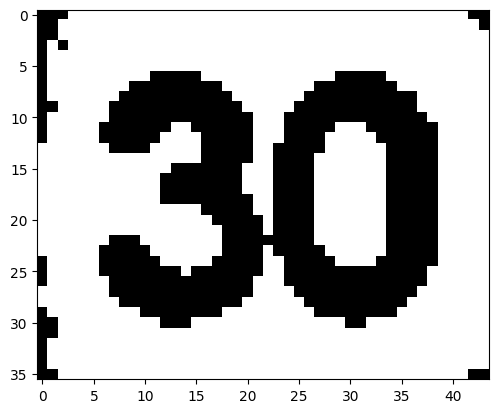

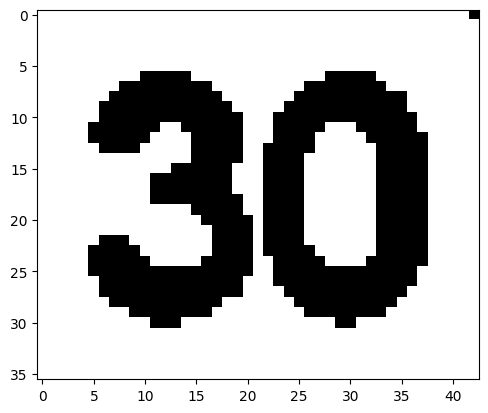

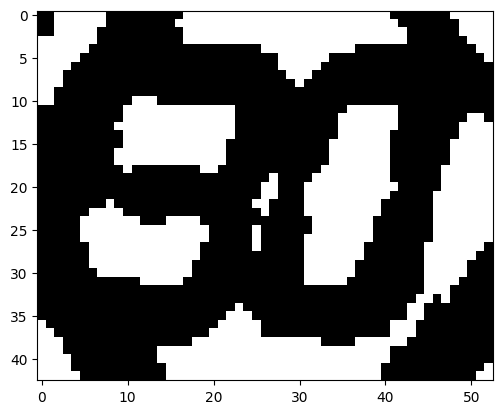

[46.jpg] Detected speed unknown does not match actual speed 30


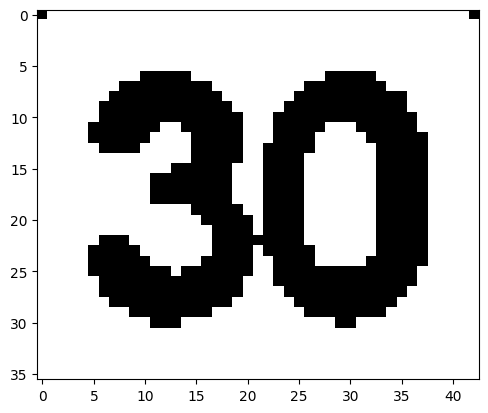

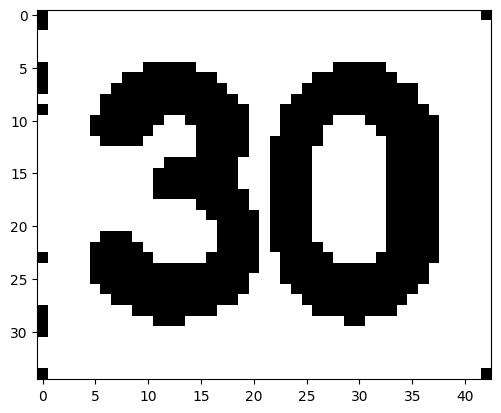

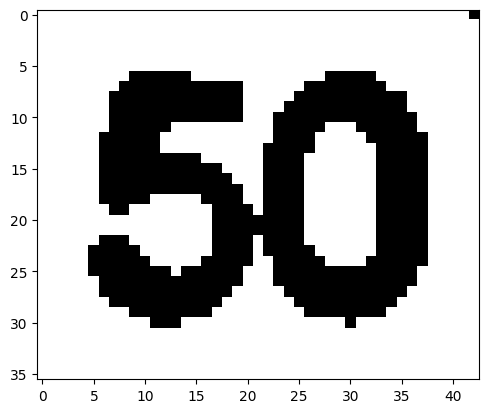

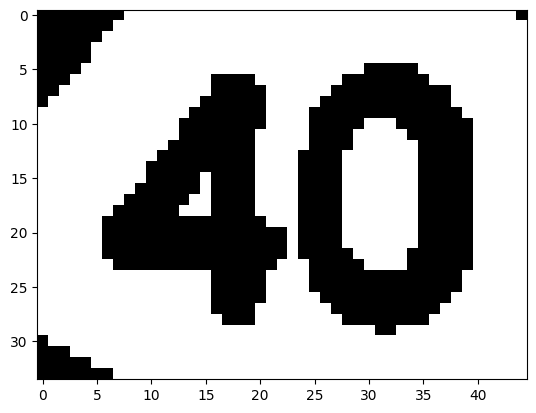

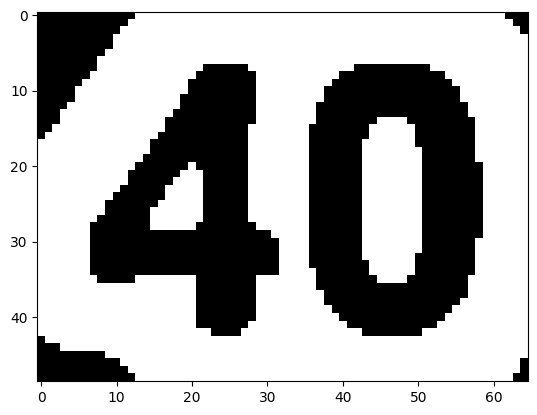

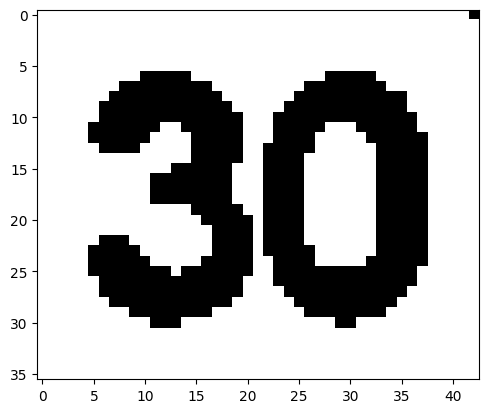

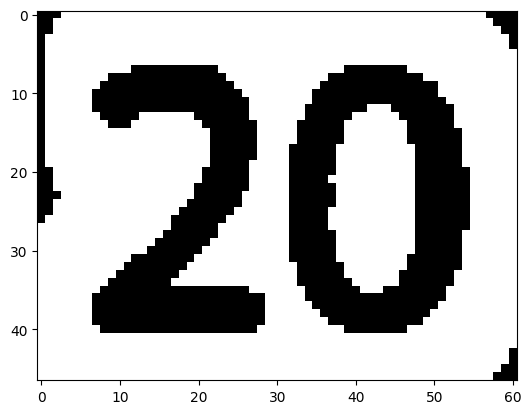

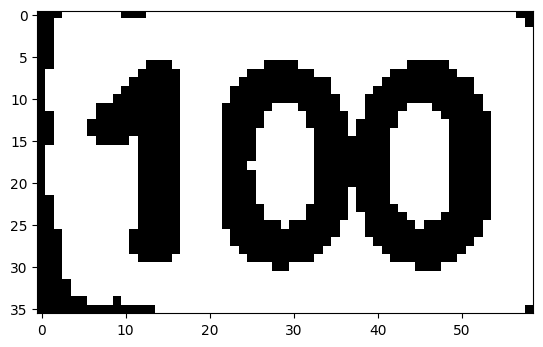

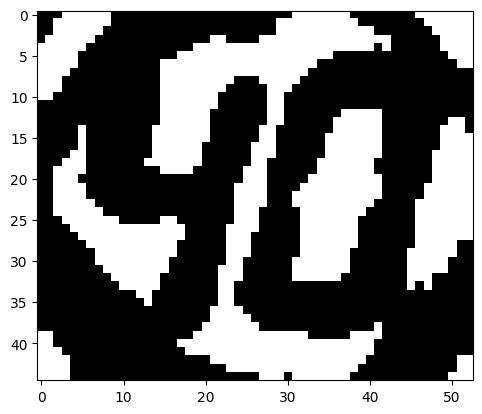

[55.jpg] Detected speed unknown does not match actual speed 40


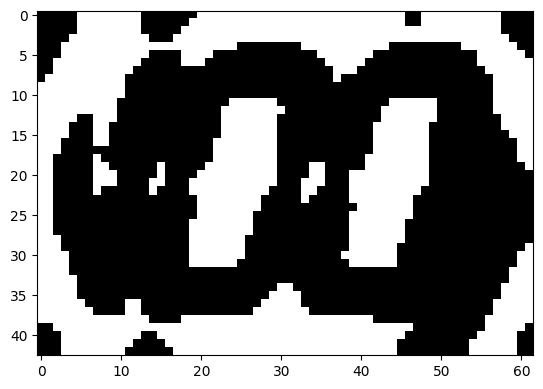

[56.jpg] Detected speed 6 does not match actual speed 100


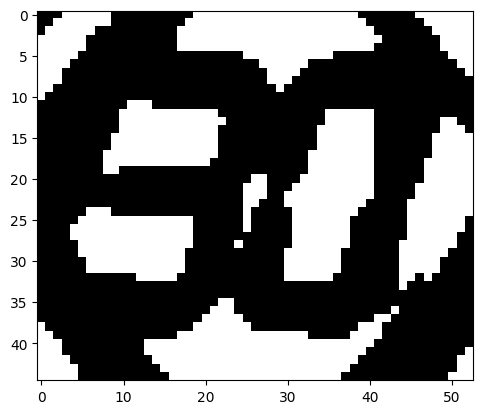

[57.jpg] Detected speed 3 does not match actual speed 30


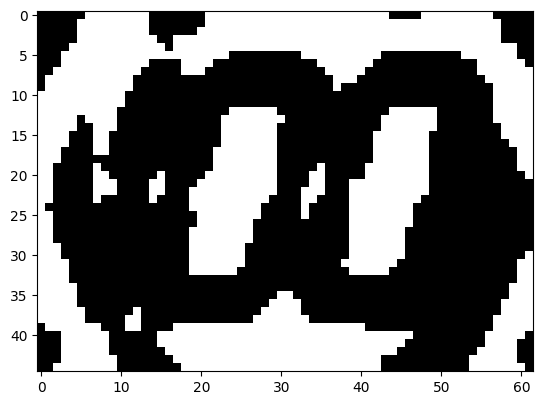

[58.jpg] Detected speed 1 does not match actual speed 100
Total percent right for param 23 and 6 =  60.34


In [43]:
with open("ground-truth/speed/speed2-truth.txt", 'r') as file:
    true_speed = [line.strip() for line in file]
  
binary_1 = 23
binary_2 = 6

images = sorted(os.listdir("speed2"))

# for binary_1 in range(35, 40, 2):
#     for binary_2 in range(4, 8, 1):
wrong_count = 0
i = 0
for image in images:
    if os.path.isfile(os.path.join("speed2/", image)):
        detect = easyocr_detect(os.path.join(os.getcwd(), "speed2/" + image), binary_1, binary_2, showImg = True)
        speed = true_speed[images.index(image)]
        if detect != speed:
            print(f"[{image}] Detected speed {detect} does not match actual speed {speed}")
            wrong_count += 1
        i+=1
        if i==17:
            break
            
print(f"Total percent right for param {binary_1} and {binary_2} = ", np.round((100 - (wrong_count / len(true_speed)) * 100), 2))

        



In [24]:
images.sort()
print(images)

['Vraag 26.jpg', 'Vraag 27.jpg', 'Vraag 28.jpg', 'Vraag 29.jpg', 'Vraag 30.jpg', 'Vraag 31.jpg', 'Vraag 32.jpg', 'Vraag 33.jpg', 'Vraag 34.jpg', 'Vraag 35.jpg', 'Vraag 36.jpg', 'Vraag 37.jpg', 'Vraag 38.jpg', 'Vraag 39.jpg', 'Vraag 40.jpg', 'Vraag 41.jpg', 'Vraag 42.jpg', 'Vraag 43.jpg', 'Vraag 44.jpg', 'Vraag 45.jpg', 'Vraag 46.jpg', 'Vraag 47.jpg', 'Vraag 48.jpg', 'Vraag 49.jpg', 'Vraag 50.jpg', 'Vraag 51.jpg', 'Vraag 52.jpg', 'Vraag 53.jpg', 'Vraag 54.jpg', 'Vraag 55.jpg', 'Vraag 56.jpg', 'Vraag 57.jpg', 'vraag 1.jpg', 'vraag 10.jpg', 'vraag 11.jpg', 'vraag 12.jpg', 'vraag 13.jpg', 'vraag 14.jpg', 'vraag 15.jpg', 'vraag 16.jpg', 'vraag 17.jpg', 'vraag 18.jpg', 'vraag 19.jpg', 'vraag 2.jpg', 'vraag 20.jpg', 'vraag 21.jpg', 'vraag 22.jpg', 'vraag 23.jpg', 'vraag 24.jpg', 'vraag 25.jpg', 'vraag 3.jpg', 'vraag 4.jpg', 'vraag 5.jpg', 'vraag 6.jpg', 'vraag 7.jpg', 'vraag 8.jpg', 'vraag 9.jpg']


In [11]:
print(len(true_speed))
print(len(os.listdir("speed2")))

57
57


In [37]:
dir = os.getcwd() + "/speed2/"

for i, image in enumerate(os.listdir("speed2")):
    name = i + 1
    os.rename(os.path.join(dir, image), os.path.join(dir, str(name) + ".jpg"))